In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import math
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import statistics  
from scipy import stats

# Task 1

Fill-in the missing values in the bank dataset. Use the EDA techniques from E-tivity 1 to decide how to fill in missing values. In your notebook, explain shortly (max 250 words) the decisions you have taken.

In [2]:
df = pd.read_csv('./bank_et2.csv')

In [3]:
df.head()

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [4]:
#Drop Unnamed column as it is just an index
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
# Find the number of nulls/NaNs in the dataset

df.apply(lambda x: sum(x.isnull()), axis=0)

age              12
job              10
marital           0
education       104
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         191
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome        454
subscribed        0
dtype: int64

Your selected dataframe has 19 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
poutcome,454,22.7
contact,191,9.6
education,104,5.2
age,12,0.6
job,10,0.5


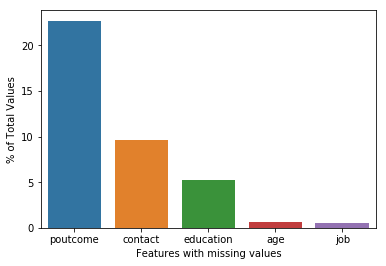

In [6]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        sns.barplot(x=mis_val_table_ren_columns.index, y=mis_val_table_ren_columns['% of Total Values'])
        plt.xlabel('Features with missing values')
        return mis_val_table_ren_columns

missing_values_table(df)

In [7]:
df['age'].describe()

count    1988.000000
mean       41.753018
std        12.724358
min        18.000000
25%        32.000000
50%        38.000000
75%        50.000000
max        93.000000
Name: age, dtype: float64

Since there are only 12 instances of age missing, and mean value is not so far from the median (41/38), I used the mean to replace the missing values

In [8]:
df['age'].fillna(df['age'].mean(), inplace=True)

Since Contact is nearly 92% filled with cellular, I filled the missing values with cellular

In [9]:
df['contact'].value_counts()

cellular     1663
telephone     146
Name: contact, dtype: int64

In [10]:
df['contact'].fillna('cellular', inplace=True)


poutcome is the result of last campaign with each customer, and we are having 454 missing values for it :

In [11]:
df['poutcome'].value_counts()

failure    955
success    444
other      147
Name: poutcome, dtype: int64

We can explore some other features related to poutcome, like pdays which is number of days that passed after the customer was last contacted during a previous marketing campaign :

In [12]:
df['pdays'].describe()

count    2000.000000
mean      167.896000
std       131.754126
min        -1.000000
25%        75.750000
50%       182.000000
75%       251.000000
max       854.000000
Name: pdays, dtype: float64

Some values are negative for this feature which is not possible, unless this means that there was no previous campaign for the customer, let us see how many customers have negative value for pdays :

In [13]:
sum(df['pdays']<0)

454

Exactly same as missing values number for poutcome,this confirms that these are just custumers who didn't have any previous campaign, we will then impute missing poutcome with a category "no previous".

In [14]:
df['poutcome'].fillna('no_previous',inplace=True)

In [15]:
df['poutcome'].value_counts()

failure        955
no_previous    454
success        444
other          147
Name: poutcome, dtype: int64

Since there are only 10 missing values in job we can remove all rows that having missing values in the job column

In [16]:
df=df.dropna(subset=['job'])

In [17]:
df['education'].value_counts()

secondary    993
tertiary     683
primary      215
Name: education, dtype: int64

I used backfill to fill missing data in the education column, the backfill method fill the data with more or less then desired ratio of the 3 different values

In [18]:
df['education'].fillna(method='bfill',inplace=True)


In [19]:
df['education'].value_counts()

secondary    1043
tertiary      719
primary       228
Name: education, dtype: int64

In [20]:
df.count()

age             1990
job             1990
marital         1990
education       1990
default         1990
balance         1990
ratio_bal_ln    1990
ratio_ln_inc    1990
housing         1990
loan            1990
contact         1990
day             1990
month           1990
duration        1990
campaign        1990
pdays           1990
previous        1990
poutcome        1990
subscribed      1990
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 1999
Data columns (total 19 columns):
age             1990 non-null float64
job             1990 non-null object
marital         1990 non-null object
education       1990 non-null object
default         1990 non-null object
balance         1990 non-null int64
ratio_bal_ln    1990 non-null float64
ratio_ln_inc    1990 non-null float64
housing         1990 non-null object
loan            1990 non-null object
contact         1990 non-null object
day             1990 non-null int64
month           1990 non-null object
duration        1990 non-null int64
campaign        1990 non-null int64
pdays           1990 non-null int64
previous        1990 non-null int64
poutcome        1990 non-null object
subscribed      1990 non-null object
dtypes: float64(3), int64(6), object(10)
memory usage: 310.9+ KB


#### Finally we convert object feature to Category type

In [22]:
objects=df.select_dtypes(include='object')
for column in objects:
    df[column]=df[column].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 1999
Data columns (total 19 columns):
age             1990 non-null float64
job             1990 non-null category
marital         1990 non-null category
education       1990 non-null category
default         1990 non-null category
balance         1990 non-null int64
ratio_bal_ln    1990 non-null float64
ratio_ln_inc    1990 non-null float64
housing         1990 non-null category
loan            1990 non-null category
contact         1990 non-null category
day             1990 non-null int64
month           1990 non-null category
duration        1990 non-null int64
campaign        1990 non-null int64
pdays           1990 non-null int64
previous        1990 non-null int64
poutcome        1990 non-null category
subscribed      1990 non-null category
dtypes: category(10), float64(3), int64(6)
memory usage: 176.6 KB


#### We display all categories, we may need this information later for prediction models

In [23]:
cats=df.select_dtypes(include='category')
for column in cats:
    print(column+'\n'+'--------')
    print(df[column].value_counts()/df[column].count())
    print('\n')

job
--------
management       0.231658
technician       0.174874
blue-collar      0.149749
admin.           0.124121
services         0.082915
retired          0.081407
student          0.048241
unemployed       0.034673
self-employed    0.032161
entrepreneur     0.022613
housemaid        0.017588
Name: job, dtype: float64


marital
--------
married     0.555276
single      0.336683
divorced    0.108040
Name: marital, dtype: float64


education
--------
secondary    0.524121
tertiary     0.361307
primary      0.114573
Name: education, dtype: float64


default
--------
no     0.992462
yes    0.007538
Name: default, dtype: float64


housing
--------
no     0.517085
yes    0.482915
Name: housing, dtype: float64


loan
--------
no     0.874372
yes    0.125628
Name: loan, dtype: float64


contact
--------
cellular     0.927136
telephone    0.072864
Name: contact, dtype: float64


month
--------
feb    0.202010
may    0.165829
jan    0.123116
apr    0.103015
jul    0.083417
aug    0.067839
s

#### Almost no costumer had a default (99%) so this feature won't be usefull for predictive models, it will be droped later

# Task 2 
Decide on the treatment of outliers in the bank data set. If appropriate, remove examples with extreme or unexpected attribute values, apply log transformation to numeric attributes with extreme values. 

In [24]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics_df=df.select_dtypes(include=numerics)
numerics_df.head()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
0,32.0,392,1.300134,0.473895,1,957,2,131,2
1,39.0,688,-0.193701,0.237021,1,233,2,133,1
2,59.0,1035,1.334266,0.121981,1,126,2,239,1
3,47.0,398,0.362286,1.251328,1,274,1,238,2
4,54.0,1004,0.072075,-0.533738,1,479,1,307,1


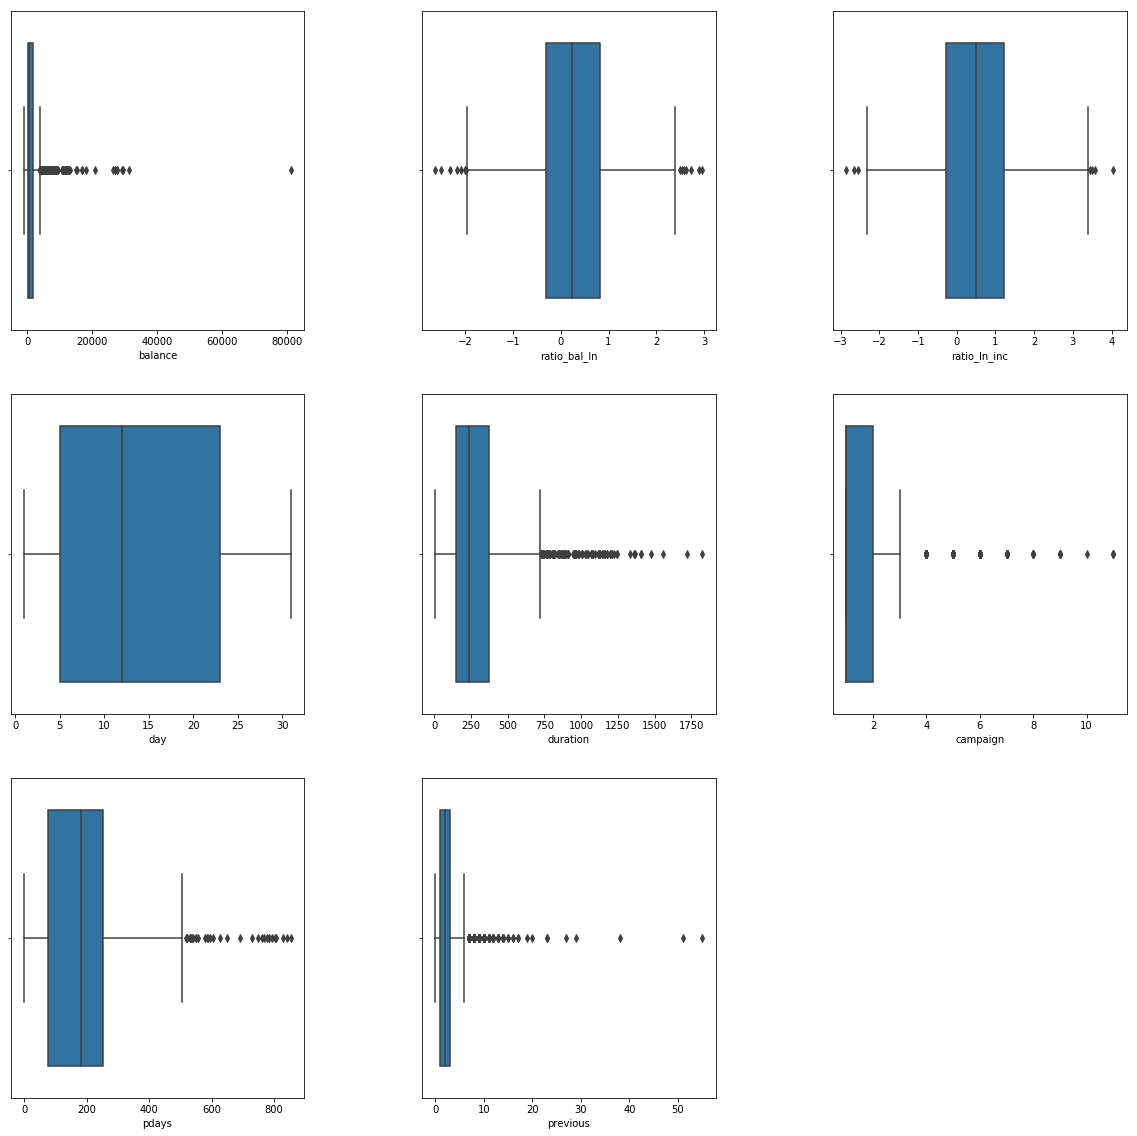

In [25]:
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.2, wspace=0.4)
for i in range(1, numerics_df.shape[1]):
    plt.subplot(numerics_df.shape[1]/3, numerics_df.shape[1]/3, i)
    sns.boxplot(x=numerics_df.iloc[:,i])
    


Outliers are mostly represented by points out of the box (the Q1-Q3 range), these are the points we have to manage and remove from our data. to do that we will use the Inter Quartile Range (IQR) which is the difference between 75th and 25th percentiles. We will calculate this statistique in a first time and then remove data points that are above or under this value with a predefined treshold. We will choose a reasonable treshold of 4 for this task, so only very far points from Q1/Q3 will be removed and hence we will avoid to remove some coorect data erroneously

In [26]:
Q1 = numerics_df.quantile(0.25)
Q3 = numerics_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age               18.000000
balance         1435.750000
ratio_bal_ln       1.115552
ratio_ln_inc       1.486669
day               18.000000
duration         229.750000
campaign           1.000000
pdays            174.750000
previous           2.000000
dtype: float64


In [27]:
print(numerics_df.shape)
treshold=4
numerics_df =  numerics_df[~(( numerics_df < (Q1 - treshold * IQR)) |( numerics_df > (Q3 + treshold * IQR))).any(axis=1)]
print(numerics_df.shape)

(1990, 9)
(1864, 9)


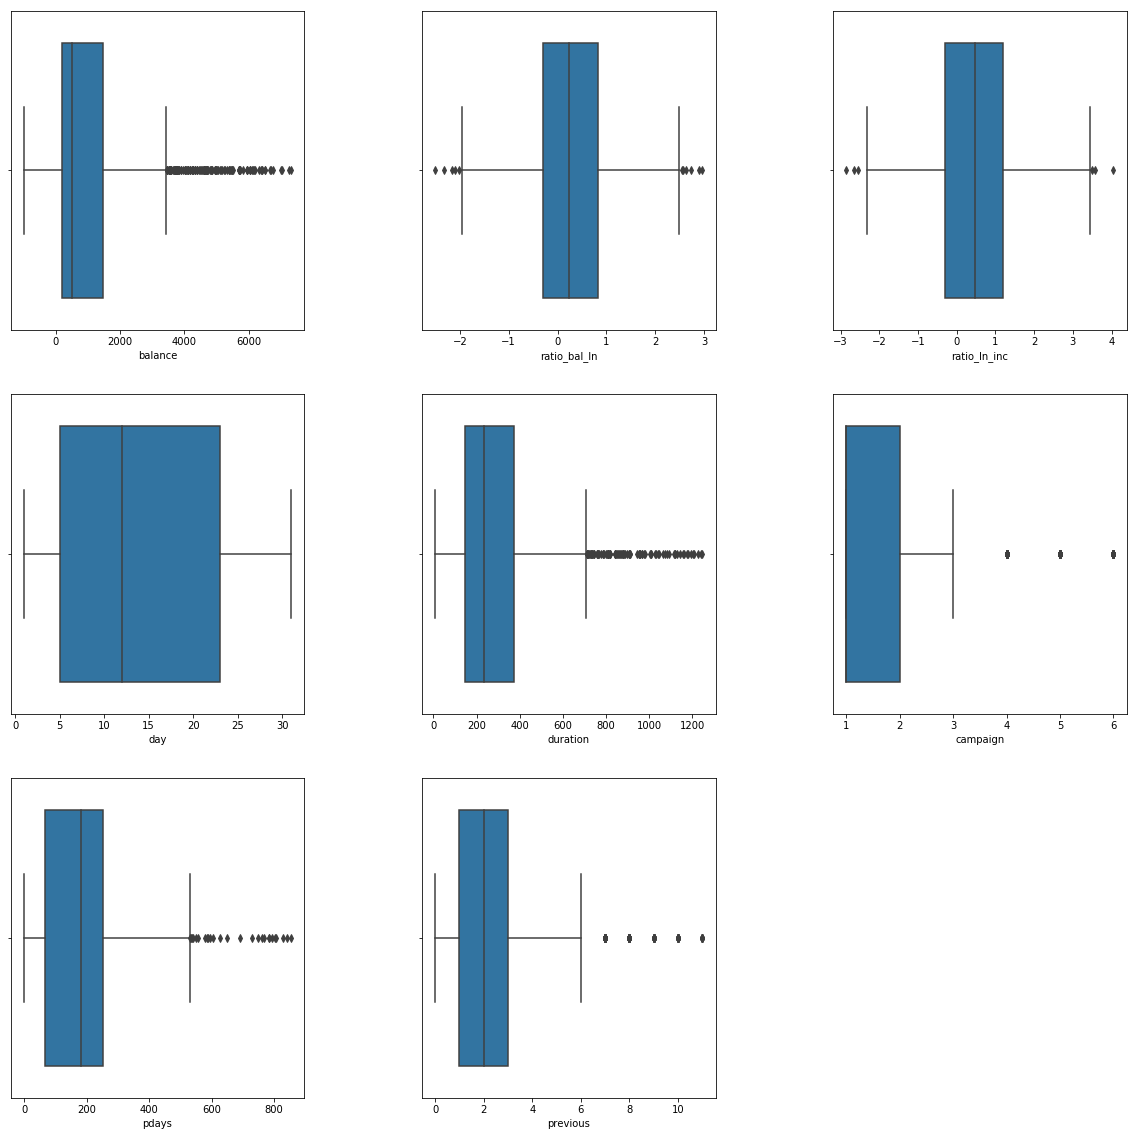

In [28]:
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.2, wspace=0.4)
for i in range(1, numerics_df.shape[1]):
    plt.subplot(numerics_df.shape[1]/3, numerics_df.shape[1]/3, i)
    sns.boxplot(x=numerics_df.iloc[:,i])
    

We see that even if we still have some points out of the IQR Box, we nomore having isolated data points as before removing outliers

#### Back to our DF

In [29]:
#Get indexes of numerics_df, so we can select these rows from original df
outliers_indexes=numerics_df.index


print("Original number of rows: %5d"  % df.shape[0])
df=df.loc[outliers_indexes.values,:]#only rows without outliers are selected
print('number of rows after outliers removal: %5d' % df.shape[0])


Original number of rows:  1990
number of rows after outliers removal:  1864


In [30]:
df.head(20)#verifying row 9 was removed

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no
5,46.0,self-employed,divorced,tertiary,no,926,0.233619,0.922197,yes,no,cellular,1,apr,463,1,133,3,failure,no
6,34.0,blue-collar,married,secondary,no,1924,0.022648,0.724227,yes,yes,cellular,1,apr,161,2,253,1,failure,no
7,45.0,services,divorced,secondary,no,396,-0.724889,-0.998605,yes,yes,cellular,1,apr,251,4,329,4,failure,no
8,58.0,management,divorced,tertiary,no,315,0.502131,-0.045391,yes,no,cellular,1,apr,121,2,135,2,failure,no
10,38.0,management,single,secondary,no,715,1.079459,-1.642914,yes,no,cellular,2,apr,951,1,132,3,failure,no


# Task 3